<a href="https://colab.research.google.com/github/leeseetja/CodeRefineryMay2021/blob/main/Weather_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset

data = pd.read_csv('/content/Irene_sounding_1979_1979.csv', na_values='-9999.0')

In [3]:
data = data.dropna()

In [4]:
data

,datetime,pressure,height,temperature,dewpoint,theta,RH,speed,direction,u_wind,v_wind
11,1979-01-01 00:00:00,500.0,5883.0,265.65,246.95,323.830977,20.826654,12.3,260.0,12.1,2.1
14,1979-01-01 00:00:00,400.0,7592.0,257.25,235.45,334.235464,13.499621,9.2,250.0,8.6,3.1
23,1979-01-01 12:00:00,848.0,1525.0,300.75,291.75,315.256438,57.985271,6.1,330.0,3.1,-5.3
24,1979-01-01 12:00:00,826.0,1756.0,296.35,282.35,312.986005,40.910248,7.2,350.0,1.3,-7.1
25,1979-01-01 12:00:00,726.0,2864.0,286.55,280.55,314.002284,66.997293,7.7,335.0,3.3,-7.0
...,...,...,...,...,...,...,...,...,...,...,...
2607,1979-01-31 12:00:00,854.0,1525.0,293.55,287.55,307.089912,68.433240,2.5,20.0,-0.9,-2.3
2608,1979-01-31 12:00:00,850.0,1559.0,293.55,285.55,307.502114,60.067491,2.5,20.0,-0.9,-2.3
2627,1979-01-31 12:00:00,500.0,5900.0,266.85,260.85,325.293794,62.453781,1.5,230.0,1.1,1.0
2633,1979-01-31 12:00:00,400.0,7620.0,256.85,248.85,333.715759,50.099615,4.6,245.0,4.2,1.9


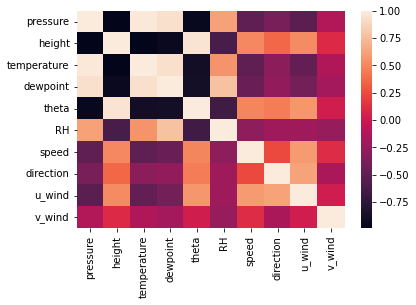

In [5]:
sns.heatmap(data.corr())

In [6]:
X = data.iloc[:, 4:5].values
y = data.iloc[:,6:7].values

In [7]:
X

array([[246.95],
       [235.45],
       [291.75],
       [282.35],
       [280.55],
       [274.55],
       [274.75],
       [268.75],
       [260.55],
       [239.65],
       [231.85],
       [229.45],
       [227.25],
       [234.45],
       [230.65],
       [287.35],
       [284.95],
       [281.75],
       [275.55],
       [274.35],
       [264.65],
       [255.65],
       [255.45],
       [250.65],
       [251.65],
       [242.05],
       [233.85],
       [290.95],
       [274.95],
       [253.65],
       [237.45],
       [240.05],
       [234.05],
       [228.85],
       [222.65],
       [284.35],
       [269.35],
       [245.45],
       [233.85],
       [221.65],
       [192.65],
       [280.75],
       [271.15],
       [243.05],
       [237.45],
       [233.05],
       [219.45],
       [283.05],
       [282.75],
       [279.55],
       [278.95],
       [274.05],
       [274.65],
       [270.75],
       [271.65],
       [232.25],
       [232.05],
       [240.25],
       [228.85

In [8]:
y

array([[ 20.82665368],
       [ 13.49962125],
       [ 57.98527098],
       [ 40.910248  ],
       [ 66.99729342],
       [ 50.19522969],
       [ 61.41993237],
       [ 42.31687683],
       [ 34.46422839],
       [  9.68913084],
       [ 10.45870851],
       [  8.37729921],
       [ 14.80736422],
       [ 45.39299625],
       [ 39.95532162],
       [ 90.21052896],
       [ 76.12678473],
       [ 67.24966132],
       [ 41.53664603],
       [ 38.61407371],
       [ 58.8838771 ],
       [ 52.15863608],
       [ 52.09953277],
       [ 36.68895805],
       [ 70.96158076],
       [ 57.32011844],
       [ 49.73967349],
       [ 54.50156493],
       [ 47.10437878],
       [ 44.00509285],
       [ 10.8224172 ],
       [ 16.94564748],
       [ 14.06906853],
       [ 20.07048291],
       [ 18.14674051],
       [ 63.64452591],
       [ 30.46017753],
       [ 17.06466137],
       [ 14.01760969],
       [ 17.83841147],
       [  0.84358615],
       [ 31.78530108],
       [ 49.24299814],
       [ 14

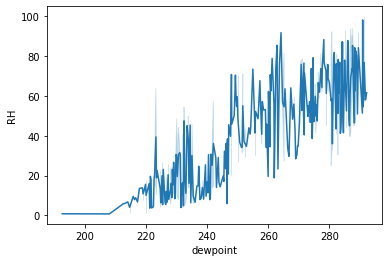

In [20]:
# visualise the dataset

sns.lineplot(x='dewpoint',y='RH',data=data)

In [22]:
# split the data into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# fit simple linear regression to the training dataset

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
# predict the test dataset

y_pred = lr.predict(X_test)

In [35]:
y_pred

array([[55.05847577],
       [66.55375961],
       [35.21050368],
       [35.21050368],
       [63.08036449],
       [24.79031833],
       [53.81797752],
       [63.90736333],
       [67.04995891],
       [58.61457077],
       [66.22296007],
       [33.39110624],
       [18.00892787],
       [ 7.91954205],
       [26.11351647],
       [11.55833694],
       [65.39596124],
       [30.24851066],
       [22.80552112],
       [57.53947228],
       [58.28377124],
       [34.21810507],
       [21.48232298],
       [56.29897403],
       [61.92256612],
       [16.68572973],
       [49.68298333],
       [46.45768787],
       [17.01652926],
       [61.59176659],
       [13.87393368],
       [64.89976194],
       [21.97852228],
       [24.79031833],
       [57.62217217],
       [25.12111787],
       [49.26948391],
       [22.30932182],
       [69.77905507],
       [13.54313414],
       [59.93776891],
       [10.56593833],
       [20.48992438],
       [22.14392205],
       [23.79791973],
       [23

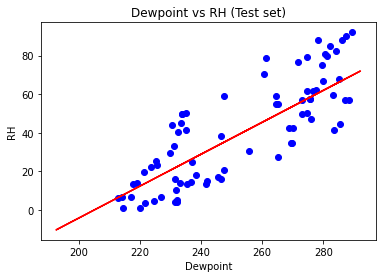

In [41]:
# visualise the test dataset

plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Dewpoint vs RH (Test set)')
plt.xlabel('Dewpoint')
plt.ylabel('RH')
plt.show()

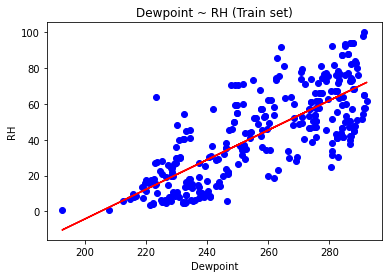

In [42]:
# visualise the training dataset

plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.title('Dewpoint ~ RH (Train set)')
plt.xlabel('Dewpoint')
plt.ylabel('RH')
plt.show()

In [43]:
# calculate the residuals

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 12.79598548899084
MSE: 226.34473745282497
RMSE: 15.044757806386414
